### https://coinmarketcap.com/

In [48]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '8cb55ad2-fb25-467d-bbaa-bc55409c0e71',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

 

In [49]:
type(data)

dict

In [50]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [51]:
#normalizes the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9989,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930130e+07,1.930130e+07,NaN,1,NaN,NaN,None,2023-02-25T08:11:00.000Z,23134.669198,2.491039e+10,-13.2026,0.170143,-2.924954,-5.575742,0.526355,37.101500,39.671255,4.465292e+11,42.0984,4.858281e+11,None,2023-02-25T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
1,1027,Ethereum,ETH,ethereum,6497,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-25T08:11:00.000Z,1605.297510,8.415760e+09,0.9036,0.282679,-2.832460,-5.035805,-0.148952,31.577775,31.828139,1.964465e+11,18.5225,1.964465e+11,None,2023-02-25T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
2,825,Tether,USDT,tether,48312,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.079823e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-25T08:10:00.000Z,1.000126,3.755164e+10,-1.5181,-0.004905,-0.000469,-0.014125,-0.003151,0.027990,0.059225,7.080715e+10,6.6781,7.315098e+10,None,2023-02-25T08:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-25 11:13:04.100369
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578961e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-25T08:10:00.000Z,301.958965,4.366892e+08,-5.3212,0.102672,-2.895899,-4.420627,-1.491759,24.183143,-3.854016,4.767816e+10,4.4969,4.830738e+10,None,2023-02-25T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
4,3408,USD Coin,USDC,usd-coin,10329,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.247904e+10,4.247904e+10,NaN,5,NaN,NaN,None,2023-02-25T08:10:00.000Z,1.000094,4.024387e+09,5.0620,0.007625,0.016842,0.009991,-0.000948,0.010014,0.000481,4.248303e+10,4.0063,4.248303e+10,None,2023-02-25T08:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-25 11:13:04.100369
5,52,XRP,XRP,xrp,892,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-02-25T08:11:00.000Z,0.378358,8.561804e+08,-0.9462,0.105362,-2.716452,-3.927264,-7.725172,3.001590,-5.654403,1.927771e+10,1.8173,3.783584e+10,None,2023-02-25T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.465877e+10,3.552041e+10,NaN,7,NaN,NaN,None,2023-02-25T08:10:00.000Z,0.366453,3.738262e+08,31.5211,0.483350,-3.901846,-8.474439,-2.867120,38.962293,15.344187,1.270079e+10,1.1975,1.649036e+10,None,2023-02-25T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
7,4687,Binance USD,BUSD,binance-usd,6291,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.112935e+10,1.112935e+10,NaN,8,NaN,NaN,None,2023-02-25T08:10:00.000Z,1.000248,7.340948e+09,-6.1029,-0.006520,0.024272,0.016212,0.034010,0.007636,-0.000113,1.113211e+10,1.0496,1.113211e+10,None,2023-02-25T08:10:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-25 11:13:04.100369
8,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,None,

In [62]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '8cb55ad2-fb25-467d-bbaa-bc55409c0e71',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    

    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.Timestamp.now()
    #df = df2.append(df2)
    #df = pd.concat([df,df2])
    
    
    
    #Create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df

    if not os.path.isfile(r'C:\Users\admin\OneDrive\Desktop\Project VSC\DATA ANALYST\OTHER\project 2\API.csv'):
        df.to_csv(r'C:\Users\admin\OneDrive\Desktop\Project VSC\DATA ANALYST\OTHER\project 2\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\admin\OneDrive\Desktop\Project VSC\DATA ANALYST\OTHER\project 2\API.csv', mode='a', header=False)
            

In [63]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [64]:
df72 = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Project VSC\DATA ANALYST\OTHER\project 2\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9989,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.930130e+07,1.930130e+07,NaN,1,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,23132.396063,2.466675e+10,-14.6045,0.103955,-3.285210,-5.721036,0.617281,37.080374,39.808679,4.464853e+11,42.0755,4.857803e+11,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
1,1,1027,Ethereum,ETH,ethereum,6497,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,1605.335860,8.362655e+09,-0.4623,0.244919,-2.953330,-5.079422,-0.039618,31.614078,32.215905,1.964512e+11,18.5118,1.964512e+11,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
2,2,825,Tether,USDT,tether,48312,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.079823e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,1.000145,3.727042e+10,-2.7491,0.001230,0.000294,-0.011106,-0.000631,0.024621,0.057697,7.080847e+10,6.6705,7.315235e+10,NaN,2023-02-25T08:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-25 08:43:13.164446
3,3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578961e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,302.082550,4.316746e+08,-7.1120,0.177426,-3.008095,-4.487970,-1.011609,24.268727,-3.724165,4.769766e+10,4.4951,4.832716e+10,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
4,4,3408,USD Coin,USDC,usd-coin,10329,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.247904e+10,4.247904e+10,NaN,5,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,0.999976,3.989873e+09,3.8228,0.002266,-0.014764,0.008571,0.008521,-0.011734,-0.015597,4.247802e+10,4.0022,4.247802e+10,NaN,2023-02-25T08:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-25 08:43:13.164446
5,5,52,XRP,XRP,xrp,892,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,0.378905,8.519822e+08,-2.2213,0.071440,-2.702008,-3.597284,-7.737412,2.151442,-5.182537,1.930557e+10,1.8194,3.789053e+10,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
6,6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.465877e+10,3.552041e+10,NaN,7,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,0.366427,3.728745e+08,29.4595,0.433627,-4.088034,-8.626816,-2.537778,39.050750,15.418878,1.269990e+10,1.1967,1.648920e+10,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
7,7,4687,Binance USD,BUSD,binance-usd,6291,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.112935e+10,1.112935e+10,NaN,8,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,1.000131,7.271606e+09,-7.5018,-0.007925,-0.003674,0.003246,0.000588,0.010626,-0.015408,1.113081e+10,1.0489,1.113081e+10,NaN,2023-02-25T08:41:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-25 08:43:13.164446
8,8,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,

In [54]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9989,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930130e+07,1.930130e+07,NaN,1,NaN,NaN,None,2023-02-25T08:11:00.000Z,23134.669198,2.491039e+10,-13.2026,0.170143,-2.924954,-5.575742,0.526355,37.101500,39.671255,4.465292e+11,42.0984,4.858281e+11,None,2023-02-25T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
1,1027,Ethereum,ETH,ethereum,6497,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-25T08:11:00.000Z,1605.297510,8.415760e+09,0.9036,0.282679,-2.832460,-5.035805,-0.148952,31.577775,31.828139,1.964465e+11,18.5225,1.964465e+11,None,2023-02-25T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
2,825,Tether,USDT,tether,48312,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.079823e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-25T08:10:00.000Z,1.000126,3.755164e+10,-1.5181,-0.004905,-0.000469,-0.014125,-0.003151,0.027990,0.059225,7.080715e+10,6.6781,7.315098e+10,None,2023-02-25T08:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-25 11:13:04.100369
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578961e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-25T08:10:00.000Z,301.958965,4.366892e+08,-5.3212,0.102672,-2.895899,-4.420627,-1.491759,24.183143,-3.854016,4.767816e+10,4.4969,4.830738e+10,None,2023-02-25T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
4,3408,USD Coin,USDC,usd-coin,10329,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.247904e+10,4.247904e+10,NaN,5,NaN,NaN,None,2023-02-25T08:10:00.000Z,1.000094,4.024387e+09,5.0620,0.007625,0.016842,0.009991,-0.000948,0.010014,0.000481,4.248303e+10,4.0063,4.248303e+10,None,2023-02-25T08:10:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-25 11:13:04.100369
5,52,XRP,XRP,xrp,892,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-02-25T08:11:00.000Z,0.378358,8.561804e+08,-0.9462,0.105362,-2.716452,-3.927264,-7.725172,3.001590,-5.654403,1.927771e+10,1.8173,3.783584e+10,None,2023-02-25T08:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.465877e+10,3.552041e+10,NaN,7,NaN,NaN,None,2023-02-25T08:10:00.000Z,0.366453,3.738262e+08,31.5211,0.483350,-3.901846,-8.474439,-2.867120,38.962293,15.344187,1.270079e+10,1.1975,1.649036e+10,None,2023-02-25T08:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:13:04.100369
7,4687,Binance USD,BUSD,binance-usd,6291,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.112935e+10,1.112935e+10,NaN,8,NaN,NaN,None,2023-02-25T08:10:00.000Z,1.000248,7.340948e+09,-6.1029,-0.006520,0.024272,0.016212,0.034010,0.007636,-0.000113,1.113211e+10,1.0496,1.113211e+10,None,2023-02-25T08:10:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-25 11:13:04.100369
8,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,None,

In [65]:
df72 = pd.read_csv(r'C:/Users/admin/OneDrive/Desktop/Project VSC/DATA ANALYST/OTHER/project 2/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9989,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.930130e+07,1.930130e+07,NaN,1,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,23132.396063,2.466675e+10,-14.6045,0.103955,-3.285210,-5.721036,0.617281,37.080374,39.808679,4.464853e+11,42.0755,4.857803e+11,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
1,1,1027,Ethereum,ETH,ethereum,6497,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,1605.335860,8.362655e+09,-0.4623,0.244919,-2.953330,-5.079422,-0.039618,31.614078,32.215905,1.964512e+11,18.5118,1.964512e+11,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
2,2,825,Tether,USDT,tether,48312,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.079823e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,1.000145,3.727042e+10,-2.7491,0.001230,0.000294,-0.011106,-0.000631,0.024621,0.057697,7.080847e+10,6.6705,7.315235e+10,NaN,2023-02-25T08:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-25 08:43:13.164446
3,3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578961e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,302.082550,4.316746e+08,-7.1120,0.177426,-3.008095,-4.487970,-1.011609,24.268727,-3.724165,4.769766e+10,4.4951,4.832716e+10,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
4,4,3408,USD Coin,USDC,usd-coin,10329,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.247904e+10,4.247904e+10,NaN,5,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,0.999976,3.989873e+09,3.8228,0.002266,-0.014764,0.008571,0.008521,-0.011734,-0.015597,4.247802e+10,4.0022,4.247802e+10,NaN,2023-02-25T08:41:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-25 08:43:13.164446
5,5,52,XRP,XRP,xrp,892,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,0.378905,8.519822e+08,-2.2213,0.071440,-2.702008,-3.597284,-7.737412,2.151442,-5.182537,1.930557e+10,1.8194,3.789053e+10,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
6,6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.465877e+10,3.552041e+10,NaN,7,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,0.366427,3.728745e+08,29.4595,0.433627,-4.088034,-8.626816,-2.537778,39.050750,15.418878,1.269990e+10,1.1967,1.648920e+10,NaN,2023-02-25T08:41:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 08:43:13.164446
7,7,4687,Binance USD,BUSD,binance-usd,6291,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.112935e+10,1.112935e+10,NaN,8,NaN,NaN,NaN,2023-02-25T08:41:00.000Z,1.000131,7.271606e+09,-7.5018,-0.007925,-0.003674,0.003246,0.000588,0.010626,-0.015408,1.113081e+10,1.0489,1.113081e+10,NaN,2023-02-25T08:41:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-25 08:43:13.164446
8,8,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,

In [66]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9989,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.930130e+07,1.930130e+07,NaN,1,NaN,NaN,None,2023-02-25T08:46:00.000Z,23134.374157,2.462719e+10,-14.8109,0.157614,-3.231013,-5.751841,0.463212,37.104347,39.820979,4.465235e+11,42.0691,4.858219e+11,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
1,1027,Ethereum,ETH,ethereum,6497,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-25T08:46:00.000Z,1605.663687,8.355340e+09,-0.6011,0.295866,-2.890555,-5.100029,-0.146807,31.645034,32.289220,1.964913e+11,18.5141,1.964913e+11,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
2,825,Tether,USDT,tether,48312,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.079823e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-25T08:46:00.000Z,1.000149,3.723208e+10,-2.8733,0.003161,0.002610,-0.010663,-0.001010,0.029245,0.060173,7.080875e+10,6.6732,7.315264e+10,None,2023-02-25T08:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-25 11:48:45.852010
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578961e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-25T08:46:00.000Z,302.179053,4.313015e+08,-7.1439,0.240046,-2.924047,-4.393881,-1.121581,24.320847,-3.723756,4.771290e+10,4.4953,4.834259e+10,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
4,3408,USD Coin,USDC,usd-coin,10329,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.247904e+10,4.247904e+10,NaN,5,NaN,NaN,None,2023-02-25T08:46:00.000Z,0.999959,3.985422e+09,3.7357,0.002314,-0.011595,-0.003083,-0.010975,-0.010069,-0.017181,4.247729e+10,4.0030,4.247729e+10,None,2023-02-25T08:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-25 11:48:45.852010
5,52,XRP,XRP,xrp,892,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-02-25T08:46:00.000Z,0.379183,8.517185e+08,-2.2264,0.281426,-2.582316,-3.459084,-7.780583,2.145398,-5.064073,1.931973e+10,1.8202,3.791832e+10,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.465877e+10,3.552041e+10,NaN,7,NaN,NaN,None,2023-02-25T08:46:00.000Z,0.366703,3.727378e+08,29.4118,0.559097,-3.927100,-8.556366,-2.596229,39.167532,15.454680,1.270948e+10,1.1975,1.650164e+10,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
7,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-02-25T08:46:00.000Z,1.275582,6.258830e+08,36.3327,0.766851,-5.322363,-16.522452,27.770043,56.748188,49.256184,1.114134e+10,1.0498,1.275582e+10,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
8,4687,Binance USD,BUSD,binance-usd,6291,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.112935e+10,1.112935e+10,NaN,9,NaN,NaN,None,2

In [67]:
#Edit numbers

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [68]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9989,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19301300.00000,19301300.00000,NaN,1,NaN,NaN,None,2023-02-25T08:46:00.000Z,23134.37416,24627192810.43088,-14.81090,0.15761,-3.23101,-5.75184,0.46321,37.10435,39.82098,446523495921.00195,42.06910,485821857301.89001,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
1,1027,Ethereum,ETH,ethereum,6497,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-25T08:46:00.000Z,1605.66369,8355340311.47142,-0.60110,0.29587,-2.89055,-5.10003,-0.14681,31.64503,32.28922,196491273256.29868,18.51410,196491273256.29999,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
2,825,Tether,USDT,tether,48312,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,70798228838.68707,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-25T08:46:00.000Z,1.00015,37232079995.99128,-2.87330,0.00316,0.00261,-0.01066,-0.00101,0.02925,0.06017,70808749979.59996,6.67320,73152635729.17000,None,2023-02-25T08:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-25 11:48:45.852010
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157896123.09636,159979963.59043,NaN,4,NaN,NaN,None,2023-02-25T08:46:00.000Z,302.17905,431301479.84828,-7.14390,0.24005,-2.92405,-4.39388,-1.12158,24.32085,-3.72376,47712900935.42172,4.49530,48342593882.33000,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
4,3408,USD Coin,USDC,usd-coin,10329,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42479043458.69053,42479043458.69053,NaN,5,NaN,NaN,None,2023-02-25T08:46:00.000Z,0.99996,3985421746.72047,3.73570,0.00231,-0.01160,-0.00308,-0.01097,-0.01007,-0.01718,42477286789.37180,4.00300,42477286789.37000,None,2023-02-25T08:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-25 11:48:45.852010
5,52,XRP,XRP,xrp,892,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-02-25T08:46:00.000Z,0.37918,851718500.40956,-2.22640,0.28143,-2.58232,-3.45908,-7.78058,2.14540,-5.06407,19319731171.44333,1.82020,37918321877.34000,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34658767341.97800,35520414310.28900,NaN,7,NaN,NaN,None,2023-02-25T08:46:00.000Z,0.36670,372737772.84024,29.41180,0.55910,-3.92710,-8.55637,-2.59623,39.16753,15.45468,12709479869.70827,1.19750,16501642672.22000,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
7,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-02-25T08:46:00.000Z,1.27558,625882979.93185,36.33270,0.76685,-5.32236,-16.52245,27.77004,56.74819,49.25618,11141338478.17500,1.04980,12755820371.43000,None,2023-02-25T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-25 11:48:45.852010
8,4

In [69]:
#Looking at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.15761,-3.23101,-5.75184,0.46321,37.10435,39.82098
Ethereum,0.29587,-2.89055,-5.10003,-0.14681,31.64503,32.28922
Tether,0.00316,0.00261,-0.01066,-0.00101,0.02925,0.06017
BNB,0.24005,-2.92405,-4.39388,-1.12158,24.32085,-3.72376
USD Coin,0.00231,-0.01160,-0.00308,-0.01097,-0.01007,-0.01718
XRP,0.28143,-2.58232,-3.45908,-7.78058,2.14540,-5.06407
Cardano,0.55910,-3.92710,-8.55637,-2.59623,39.16753,15.45468
Polygon,0.76685,-5.32236,-16.52245,27.77004,56.74819,49.25618
Binance USD,-0.01523,-0.02579,0.02545,0.04425,0.02252,-0.02687


In [70]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.15761
             quote.USD.percent_change_24h    -3.23101
             quote.USD.percent_change_7d     -5.75184
             quote.USD.percent_change_30d     0.46321
             quote.USD.percent_change_60d    37.10435
             quote.USD.percent_change_90d    39.82098
Ethereum     quote.USD.percent_change_1h      0.29587
             quote.USD.percent_change_24h    -2.89055
             quote.USD.percent_change_7d     -5.10003
             quote.USD.percent_change_30d    -0.14681
             quote.USD.percent_change_60d    31.64503
             quote.USD.percent_change_90d    32.28922
Tether       quote.USD.percent_change_1h      0.00316
             quote.USD.percent_change_24h     0.00261
             quote.USD.percent_change_7d     -0.01066
             quote.USD.percent_change_30d    -0.00101
             quote.USD.percent_change_60d     0.02925
             quote.USD.percent_change_90

In [71]:
type(df4)

pandas.core.series.Series

In [72]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.15761
            quote.USD.percent_change_24h  -3.23101
            quote.USD.percent_change_7d   -5.75184
            quote.USD.percent_change_30d   0.46321
            quote.USD.percent_change_60d  37.10435
            quote.USD.percent_change_90d  39.82098
Ethereum    quote.USD.percent_change_1h    0.29587
            quote.USD.percent_change_24h  -2.89055
            quote.USD.percent_change_7d   -5.10003
            quote.USD.percent_change_30d  -0.14681
            quote.USD.percent_change_60d  31.64503
            quote.USD.percent_change_90d  32.28922
Tether      quote.USD.percent_change_1h    0.00316
            quote.USD.percent_change_24h   0.00261
            quote.USD.percent_change_7d   -0.01066
            quote.USD.percent_change_30d  -0.00101
            quote.USD.percent_change_60d   0.02925
            quote.USD.percent_change_90d   0.06017
BNB         quote.USD.percent_change_1h    0.24005
            quote.USD.percent_change_24h  -2.92405
            quote.USD.percent_change_7d   -4.39388
            quote.USD.percent_change_30d  -1.12158
            quote.USD.percent_change_60d  24.32085
            quote.USD.percent_change_90d  -3.72376
USD Coin    quote.USD.percent_change_1h    0.00231
            quote.USD.percent_change_24h  -0.01160
            quote.USD.percent_change_7d   -0.00308
            quote.USD.percent_change_30d  -0.01097
            quote.USD.percent_change_60d  -0.01007
            quote.USD.percent_change_90d  -0.01718
XRP         quote.USD.percent_change_1h    0.28143
            quote.USD.percent_change_24h  -2.58232
            quote.USD.percent_change_7d   -3.45908
            quote.USD.percent_change_30d  -7.78058
            quote.USD.percent_change_60d   2.14540
            quote.USD.percent_change_90d  -5.06407
Cardano     quote.USD.percent_change_1h    0.55910
            quote.USD.percent_change_24h  -3.92710
            quote.USD.percent_change_7d   -8.55637
            quote.USD.percent_change_30d  -2.59623
            quote.USD.percent_change_60d  39.16753
            quote.USD.percent_change_90d  15.45468
Polygon     quote.USD.percent_change_1h    0.76685
            quote.USD.percent_change_24h  -5.32236
            quote.USD.percent_change_7d  -16.52245
            quote.USD.percent_change_30d  27.77004
            quote.USD.percent_change_60d  56.74819
            quote.USD.percent_change_90d  49.25618
Binance USD quote.USD.percent_change_1h   -0.01523
            quote.USD.percent_change_24h  -0.02579
            quote.USD.percent_change_7d    0.02545
            quote.USD.percent_change_30d   0.04425
            quote.USD.percent_change_60d   0.02252
            quote.USD.percent_change_90d  -0.02687
Dogecoin    quote.USD.percent_change_1h    0.03331
            quote.USD.percent_change_24h  -3.72984
            quote.USD.percent_change_7d   -6.73247
            quote.USD.percent_change_30d  -5.36177
            quote.USD.percent_change_60d   8.95904
            quote.USD.percent_change_90d -15.67066
Solana      quote.USD.percent_change_1h   -0.19194
            quote.USD.percent_change_24h  -4.44878
            quote.USD.percent_change_7d   -1.11537
            quote.USD.percent_change_30d  -6.34944
            quote.USD.percent_change_60d 104.42763
            quote.USD.percent_change_90d  60.26832
Polkadot    quote.USD.percent_change_1h    0.64034
            quote.USD.percent_change_24h  -5.95620
            quote.USD.percent_change_7d   -7.88087
            quote.USD.percent_change_30d   3.65706
            quote.USD.percent_change_60d  46.65592
            quote.USD.percent_change_90d  23.12703
Shiba Inu   quote.USD.percent_change_1h    0.20180
            quote.USD.percent_change_24h  -3.99869
            quote.USD.percent_change_7d   -4.19580
            quote.USD.percent_change_30d   8.68948
            quote.USD.percent_change_60d  51.80180
            quo

In [73]:
df5.count()

values    90
dtype: int64

In [99]:
index = pd.Index(range(90))

# Set the above DataFrame 
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.15761
1,Bitcoin,quote.USD.percent_change_24h,-3.23101
2,Bitcoin,quote.USD.percent_change_7d,-5.75184
3,Bitcoin,quote.USD.percent_change_30d,0.46321
4,Bitcoin,quote.USD.percent_change_60d,37.10435
5,Bitcoin,quote.USD.percent_change_90d,39.82098
6,Ethereum,quote.USD.percent_change_1h,0.29587
7,Ethereum,quote.USD.percent_change_24h,-2.89055
8,Ethereum,quote.USD.percent_change_7d,-5.10003
9,Ethereum,quote.USD.percent_change_30d,-0.14681


In [100]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.15761
1,Bitcoin,quote.USD.percent_change_24h,-3.23101
2,Bitcoin,quote.USD.percent_change_7d,-5.75184
3,Bitcoin,quote.USD.percent_change_30d,0.46321
4,Bitcoin,quote.USD.percent_change_60d,37.10435
5,Bitcoin,quote.USD.percent_change_90d,39.82098
6,Ethereum,quote.USD.percent_change_1h,0.29587
7,Ethereum,quote.USD.percent_change_24h,-2.89055
8,Ethereum,quote.USD.percent_change_7d,-5.10003
9,Ethereum,quote.USD.percent_change_30d,-0.14681


In [101]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.15761
1,Bitcoin,24h,-3.23101
2,Bitcoin,7d,-5.75184
3,Bitcoin,30d,0.46321
4,Bitcoin,60d,37.10435
5,Bitcoin,90d,39.82098
6,Ethereum,1h,0.29587
7,Ethereum,24h,-2.89055
8,Ethereum,7d,-5.10003
9,Ethereum,30d,-0.14681


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

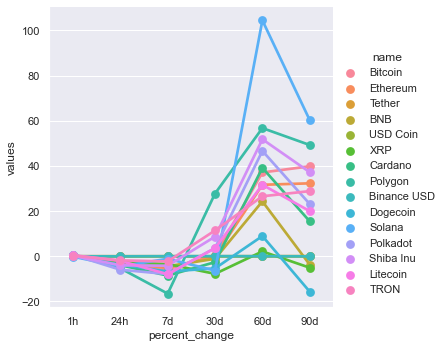

In [103]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')